In [1]:
import pandas as pd
import numpy as np

# Competition을 위한 데이터 처리 예제

- mem_data.csv 파일의 GENDER 열과 MEM_ID열은 모델링에 사용됨에 따라 수정하시면 안됩니다.

In [2]:
mem_data = pd.read_csv('mem_data.csv')
mem_tr = pd.read_csv('mem_transaction.csv')
s_info = pd.read_csv('store_info.csv')

In [3]:
mem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10764 entries, 0 to 10763
Data columns (total 15 columns):
MEM_ID         10764 non-null int64
M_STORE_ID     10764 non-null int64
GENDER         10764 non-null object
BIRTH_DT       5997 non-null object
BIRTH_SL       10764 non-null object
ZIP_CD         10764 non-null object
RGST_DT        10764 non-null object
VISIT_CNT      10764 non-null float64
SALES_AMT      10764 non-null float64
LAST_VST_DT    10764 non-null object
USABLE_PNT     10764 non-null float64
USED_PNT       10764 non-null float64
ACC_PNT        10764 non-null float64
USABLE_INIT    10764 non-null float64
SMS            10764 non-null object
dtypes: float64(6), int64(2), object(7)
memory usage: 1.2+ MB


In [4]:
mem_tr.head()

,STORE_ID,SELL_DT,MEMP_STY,MEM_ID,MEMP_DT,SELL_AMT,MEMP_TP
0,125,20060227,O,1225434,2006-02-27 13:57:44.750000000,15500,A
1,125,20060303,O,1181938,2006-03-03 15:43:56.987000000,22600,A
2,125,20060322,O,6093,2006-03-22 18:08:45.563000000,11000,A
3,125,20060403,O,1398202,2006-04-03 13:36:27.040000000,14400,A
4,125,20060418,O,1225434,2006-04-18 16:04:39.583000000,6600,A


In [5]:
s_info.head()

,STORE_ID,STORE_REGION
0,128,2
1,129,2
2,130,11
3,133,16
4,136,13


In [6]:
    mem_data.GENDER.value_counts()

M          3767
F          3767
UNKNOWN    3230
Name: GENDER, dtype: int64

## **[mem_data 처리]**

**[변수 처리 1]** SMS 수신동의 정수 처리하기

In [7]:
mem_data.SMS.value_counts()

Y    10575
N      189
Name: SMS, dtype: int64

In [8]:
mem_data.SMS = (mem_data.SMS=='Y').astype(int)
mem_data.SMS.value_counts()

1    10575
0      189
Name: SMS, dtype: int64

**[변수 처리 2]** 양/음력(BIRTH_SL) 정수 처리하기 

In [9]:
mem_data.BIRTH_SL = (mem_data.BIRTH_SL=='S').astype(int)
mem_data.BIRTH_SL.value_counts()

1    8973
0    1791
Name: BIRTH_SL, dtype: int64

In [10]:
mem_data.head()

,MEM_ID,M_STORE_ID,GENDER,BIRTH_DT,BIRTH_SL,ZIP_CD,RGST_DT,VISIT_CNT,SALES_AMT,LAST_VST_DT,USABLE_PNT,USED_PNT,ACC_PNT,USABLE_INIT,SMS
0,1134945,1084,M,NaN,1,-,2006-02-04 11:51:08.233000000,8.0,337000.0,2007-01-19 21:46:12.827000000,6740.0,0.0,6740.0,3202.0,1
1,38458,539,F,1973-07-11,1,420-721,2006-02-04 11:51:08.233000000,22.0,1438500.0,2007-10-18 19:57:45.503000000,1732.0,12000.0,13732.0,17762.0,1
2,7009,1113,F,1973-04-06,1,-,2006-02-04 11:51:08.233000000,8.0,309300.0,2007-05-30 15:21:10.863000000,6372.0,0.0,6372.0,1856.0,1
3,91791,2273,UNKNOWN,1968-09-05,1,487-820,2006-02-04 11:51:08.233000000,11.0,170400.0,2007-10-16 15:55:52.483000000,3408.0,0.0,3408.0,236.0,1
4,1374842,1300,M,NaN,1,-,2006-02-04 11:51:08.233000000,3.0,110300.0,2007-03-25 12:49:30.170000000,2206.0,0.0,2206.0,1522.0,1


**[변수 처리 3]** 구매 합계(SALES_AMT) 로그 처리 하기
- 참고 : 로그처리에는 음수가 들어갈 수 없음 / 0이 있을 경우 1을 더하고 처리

In [11]:
f = mem_data.SALES_AMT.where(mem_data.SALES_AMT>=0, other=0) # 음수처리
f = np.log(f+1)
mem_data.SALES_AMT = f

**[변수 처리 4]** 로그 처리가 필요하다고 생각되는 변수를 로그처리 하기

In [12]:
f = mem_data.ACC_PNT.where(mem_data.ACC_PNT>=0, other=0) # 음수처리
f = np.log(f+1)
mem_data.ACC_PNT = f

**[변수 생성 1]** 최근 방문 일자(LAST_VST_DT)로부터 경과일 구하기

In [13]:
f = pd.to_datetime(mem_data.LAST_VST_DT) # 날짜가 Object 이므로 숫자 처리
f = (pd.to_datetime('2007-12-13') - f).dt.days #방문이 얼마나 오래되었는지 ,time 등으로 알고 싶은 것으로 바꿀 수 있다.
mem_data['E_DAY'] = f
mem_data.E_DAY.head()

0    327
1     55
2    196
3     57
4    262
Name: E_DAY, dtype: int64

In [14]:
f = pd.to_datetime(mem_data.LAST_VST_DT)

In [15]:
f = (pd.to_datetime('2007-12-13') - f)

In [16]:
f[f.isna()]

Series([], Name: LAST_VST_DT, dtype: timedelta64[ns])

In [17]:
mem_data.LAST_VST_DT[1612]

'2006-06-02 11:31:20.640000000'

In [18]:
f.isna().sum()

0

**[변수 생성 2]** 등록일(RGST_DT)로부터 경과일 구하기

In [19]:
f = pd.to_datetime(mem_data.RGST_DT) # 날짜가 Object 이므로 숫자 처리
f = (pd.to_datetime('2007-12-13') - f).dt.days #방문이 얼마나 오래되었는지 ,time 등으로 알고 싶은 것으로 바꿀 수 있다.
mem_data['E_DAY'] = f
mem_data.E_DAY.head()

0    676
1    676
2    676
3    676
4    676
Name: E_DAY, dtype: int64

**[변수 생성 3]** 우편번호(ZIP_CD)에서 광역행정구역 데이터 가져오기
- 참고: 6자리 우편번호의 구성 : https://ko.wikipedia.org/wiki/대한민국의_우편번호#6자리_우편번호_(1988~2015)

In [20]:
mem_data.ZIP_CD.head()

0          -
1    420-721
2          -
3    487-820
4          -
Name: ZIP_CD, dtype: object

In [21]:
mem_data.ZIP_CD[1][0]

'4'

In [22]:
# 리스트를 구할때 첫번째 글자만 가져올때
f = [x[0] for x in mem_data.ZIP_CD]

In [23]:
f = [x[0] for x in mem_data.ZIP_CD]
mem_data['R_REGION'] = f
mem_data.R_REGION = mem_data.R_REGION.where(mem_data.R_REGION != '-', other=0).astype(int)
mem_data.R_REGION.head()

0    0
1    4
2    0
3    4
4    0
Name: R_REGION, dtype: int32

**[변수 생성 4]** 우편번호(ZIP_CD)에서 광역행정구역과 구를 합쳐서 데이터 가져오기

In [24]:
f=mem_data.groupby('ZIP_CD')['R_REGION'].agg({'sum'}).reset_index()
mem_data=mem_data.merge(f,how='left') 
mem_data.iloc[:,-1] = mem_data.iloc[:,-1].fillna(0)

## **[다른 데이터와 연동하여 변수 생성]**

**[변수 생성 1]** 평균 구매액 구하기

In [25]:
f = mem_tr.groupby('MEM_ID')['SELL_AMT'].agg({'mean'}).reset_index()
mem_data = mem_data.merge(f, how='left')
mem_data.iloc[:,-1] = mem_data.iloc[:,-1].fillna(0)

**[변수 생성 2]** 포인트 적립 횟수 구하기

In [26]:
f = mem_tr[mem_tr.MEMP_TP=='A'].groupby('MEM_ID')['SELL_AMT'].agg({'size'}).reset_index()
mem_data = mem_data.merge(f, how='left')
mem_data.iloc[:,-1] = mem_data.iloc[:,-1].fillna(0)

**[변수 생성 3]** 요일 구매 패턴 구하기 : 주중형 / 주말형

In [27]:
def weekday(x):
    w = x.dayofweek 
    if w < 4:
        return 1 # 주중
    else:
        return 0 # 주말
f = mem_tr.groupby('MEM_ID')['SELL_DT'].agg([('요일구매패턴', lambda x : pd.to_datetime(x).apply(weekday).value_counts().index[0])]).reset_index()
mem_data = mem_data.merge(f, how='left')
mem_data.iloc[:,-1] = mem_data.iloc[:,-1].fillna(0)

**[변수 생성 4]** 시간대별 표인트 적립 건수 구하기 : Morning(09-12) / Afternoon(13-17) / Evening(18-20)

In [28]:
def f1(x):
    k = x.month
    if 9 <= k <= 12 :
        return('MORNING')
    elif 13 <= k <= 17 :
        return('AFTERNOON')
    else :
        return('EVENING')    
    
mem_tr['MEMP_DT'] = pd.to_datetime(mem_tr.SELL_DT).apply(f1)
f = pd.pivot_table(mem_tr, index='MEM_ID', columns='MEMP_DT', values='MEMP_TP', 
                   aggfunc=np.size, fill_value=0).reset_index()

# [변수 5]

In [29]:
mem_data['SALES_AVG'] = mem_data['SALES_AMT']/mem_data['VISIT_CNT']

# [변수 6]

In [30]:
mem_data['POINT_FREQ'] = mem_data['USED_PNT']/mem_data['SALES_AMT']

In [31]:
mem_data.head(5)

,MEM_ID,M_STORE_ID,GENDER,BIRTH_DT,BIRTH_SL,ZIP_CD,RGST_DT,VISIT_CNT,SALES_AMT,LAST_VST_DT,...,USABLE_INIT,SMS,E_DAY,R_REGION,sum,mean,size,요일구매패턴,SALES_AVG,POINT_FREQ
0,1134945,1084,M,NaN,1,-,2006-02-04 11:51:08.233000000,8.0,12.727841,2007-01-19 21:46:12.827000000,...,3202.0,1,676,0,0,16262.500000,8,1,1.590980,0.000000
1,38458,539,F,1973-07-11,1,420-721,2006-02-04 11:51:08.233000000,22.0,14.179112,2007-10-18 19:57:45.503000000,...,17762.0,1,676,4,4,25018.181818,22,1,0.644505,846.315331
2,7009,1113,F,1973-04-06,1,-,2006-02-04 11:51:08.233000000,8.0,12.642070,2007-05-30 15:21:10.863000000,...,1856.0,1,676,0,0,22025.000000,8,1,1.580259,0.000000
3,91791,2273,UNKNOWN,1968-09-05,1,487-820,2006-02-04 11:51:08.233000000,11.0,12.045910,2007-10-16 15:55:52.483000000,...,236.0,1,676,4,8,14418.181818,11,1,1.095083,0.000000
4,1374842,1300,M,NaN,1,-,2006-02-04 11:51:08.233000000,3.0,11.610968,2007-03-25 12:49:30.170000000,...,1522.0,1,676,0,0,11400.000000,3,1,3.870323,0.000000


In [32]:
mem_data = mem_data.fillna(0)

## **[최종 결과 저장]**

- mem_data에 최종 결과가 모일 수 있도록 준비
- 1.예측에 사용하지 않을 열들 drop
- 2.csv형태로 저장
- **주의사항1 : MEM_ID열은 삭제하지 마세요. **
- MEM_ID를 변수로 사용하기를 원하면 다른 열을 새로 생성해서 복사해서 사용하세요.
- 주의사항2 : GENDER열을 제외하고 문자열이 포함된 열이 데이터에 포함되지 않도록 한다.

In [33]:
mem_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10764 entries, 0 to 10763
Data columns (total 23 columns):
MEM_ID         10764 non-null int64
M_STORE_ID     10764 non-null int64
GENDER         10764 non-null object
BIRTH_DT       10764 non-null object
BIRTH_SL       10764 non-null int32
ZIP_CD         10764 non-null object
RGST_DT        10764 non-null object
VISIT_CNT      10764 non-null float64
SALES_AMT      10764 non-null float64
LAST_VST_DT    10764 non-null object
USABLE_PNT     10764 non-null float64
USED_PNT       10764 non-null float64
ACC_PNT        10764 non-null float64
USABLE_INIT    10764 non-null float64
SMS            10764 non-null int32
E_DAY          10764 non-null int64
R_REGION       10764 non-null int32
sum            10764 non-null int32
mean           10764 non-null float64
size           10764 non-null int64
요일구매패턴         10764 non-null int64
SALES_AVG      10764 non-null float64
POINT_FREQ     10764 non-null float64
dtypes: float64(9), int32(4), int64(5), 

In [34]:
d_col = ['BIRTH_SL','M_STORE_ID','BIRTH_DT','ZIP_CD','RGST_DT','LAST_VST_DT','USABLE_INIT','sum','mean','size']
mem_data = mem_data.drop(d_col, axis=1)
mem_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10764 entries, 0 to 10763
Data columns (total 13 columns):
MEM_ID        10764 non-null int64
GENDER        10764 non-null object
VISIT_CNT     10764 non-null float64
SALES_AMT     10764 non-null float64
USABLE_PNT    10764 non-null float64
USED_PNT      10764 non-null float64
ACC_PNT       10764 non-null float64
SMS           10764 non-null int32
E_DAY         10764 non-null int64
R_REGION      10764 non-null int32
요일구매패턴        10764 non-null int64
SALES_AVG     10764 non-null float64
POINT_FREQ    10764 non-null float64
dtypes: float64(7), int32(2), int64(3), object(1)
memory usage: 1.1+ MB


In [35]:
mem_data.head()

,MEM_ID,GENDER,VISIT_CNT,SALES_AMT,USABLE_PNT,USED_PNT,ACC_PNT,SMS,E_DAY,R_REGION,요일구매패턴,SALES_AVG,POINT_FREQ
0,1134945,M,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.000000
1,38458,F,22.0,14.179112,1732.0,12000.0,9.527557,1,676,4,1,0.644505,846.315331
2,7009,F,8.0,12.642070,6372.0,0.0,8.759826,1,676,0,1,1.580259,0.000000
3,91791,UNKNOWN,11.0,12.045910,3408.0,0.0,8.134174,1,676,4,1,1.095083,0.000000
4,1374842,M,3.0,11.610968,2206.0,0.0,7.699389,1,676,0,1,3.870323,0.000000


In [36]:
final_data = pd.read_csv('final_data.csv')

In [37]:
final_data.dtypes

MEM_ID          int64
GENDER         object
VISIT_CNT     float64
SALES_AMT     float64
USABLE_PNT    float64
USED_PNT      float64
ACC_PNT       float64
SMS             int64
E_DAY           int64
R_REGION        int64
요일구매패턴          int64
SALES_AVG     float64
POINT_FREQ    float64
STORE_ID        int64
SELL_DT         int64
MEMP_STY       object
MEMP_DT        object
SELL_AMT        int64
MEMP_TP        object
dtype: object

In [38]:
mem_data = mem_data.merge(mem_tr, how='left')
mem_data.iloc[:,-1] = mem_data.iloc[:,-1].fillna(0)

In [39]:
mem_data.head()

,MEM_ID,GENDER,VISIT_CNT,SALES_AMT,USABLE_PNT,USED_PNT,ACC_PNT,SMS,E_DAY,R_REGION,요일구매패턴,SALES_AVG,POINT_FREQ,STORE_ID,SELL_DT,MEMP_STY,MEMP_DT,SELL_AMT,MEMP_TP
0,1134945,M,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.59098,0.0,1084,20060315,O,EVENING,10000,A
1,1134945,M,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.59098,0.0,1084,20060404,O,EVENING,22300,A
2,1134945,M,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.59098,0.0,1084,20060601,O,EVENING,32000,A
3,1134945,M,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.59098,0.0,1084,20061030,O,EVENING,3000,A
4,1134945,M,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.59098,0.0,1084,20061030,O,EVENING,15300,A


In [40]:
mem_data.to_csv('final_data.csv', index=False)

In [41]:
final_data = pd.read_csv('final_data.csv')

In [42]:
final_data.dtypes

MEM_ID          int64
GENDER         object
VISIT_CNT     float64
SALES_AMT     float64
USABLE_PNT    float64
USED_PNT      float64
ACC_PNT       float64
SMS             int64
E_DAY           int64
R_REGION        int64
요일구매패턴          int64
SALES_AVG     float64
POINT_FREQ    float64
STORE_ID        int64
SELL_DT         int64
MEMP_STY       object
MEMP_DT        object
SELL_AMT        int64
MEMP_TP        object
dtype: object

In [43]:
final_data

,MEM_ID,GENDER,VISIT_CNT,SALES_AMT,USABLE_PNT,USED_PNT,ACC_PNT,SMS,E_DAY,R_REGION,요일구매패턴,SALES_AVG,POINT_FREQ,STORE_ID,SELL_DT,MEMP_STY,MEMP_DT,SELL_AMT,MEMP_TP
0,1134945,M,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.0,1084,20060315,O,EVENING,10000,A
1,1134945,M,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.0,1084,20060404,O,EVENING,22300,A
2,1134945,M,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.0,1084,20060601,O,EVENING,32000,A
3,1134945,M,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.0,1084,20061030,O,EVENING,3000,A
4,1134945,M,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.0,1084,20061030,O,EVENING,15300,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60044,973807,M,4.0,12.246259,4164.0,0.0,8.334472,1,676,0,1,3.061565,0.0,812,20070912,O,EVENING,35500,A
60045,973807,M,4.0,12.246259,4164.0,0.0,8.334472,1,676,0,1,3.061565,0.0,1701,20070428,O,EVENING,39500,A
60046,47542,F,3.0,12.246259,4164.0,0.0,8.334472,1,676,1,1,4.082086,0.0,964,20060911,O,EVENING,10300,A
60047,47542,F,3.0,12.246259,4164.0,0.0,8.334472,1,676,1,1,4.082086,0.0,1851,20070226,O,EVENING,26700,A


In [91]:
d_col = ['GENDER','MEM_ID','MEMP_STY', 'MEMP_DT', 'MEMP_TP']
x = final_data.drop(d_col, axis=1)
x.info()
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60049 entries, 0 to 60048
Data columns (total 14 columns):
VISIT_CNT     60049 non-null float64
SALES_AMT     60049 non-null float64
USABLE_PNT    60049 non-null float64
USED_PNT      60049 non-null float64
ACC_PNT       60049 non-null float64
SMS           60049 non-null int64
E_DAY         60049 non-null int64
R_REGION      60049 non-null int64
요일구매패턴        60049 non-null int64
SALES_AVG     60049 non-null float64
POINT_FREQ    60049 non-null float64
STORE_ID      60049 non-null int64
SELL_DT       60049 non-null int64
SELL_AMT      60049 non-null int64
dtypes: float64(7), int64(7)
memory usage: 6.4 MB
(60049, 14)


In [92]:
mem_data['MEMP_TP'] = mem_data['MEMP_TP'].astype('category')
mem_data['MEMP_TP'] = mem_data['MEMP_TP'].cat.codes
mem_data['MEMP_TP'].value_counts()

0    60049
Name: MEMP_TP, dtype: int64

In [93]:
mem_data['MEMP_DT'] = mem_data['MEMP_DT'].astype('category')
mem_data['MEMP_DT'] = mem_data['MEMP_DT'].cat.codes
mem_data['MEMP_DT'].value_counts()

0    60049
Name: MEMP_DT, dtype: int64

In [94]:
mem_data['GENDER'] = mem_data['GENDER'].astype('category')
mem_data['GENDER'] = mem_data['GENDER'].cat.codes
mem_data['GENDER'].value_counts()

0    21901
2    20480
1    17668
Name: GENDER, dtype: int64

In [95]:
mem_data.head()

,MEM_ID,GENDER,VISIT_CNT,SALES_AMT,USABLE_PNT,USED_PNT,ACC_PNT,SMS,E_DAY,R_REGION,요일구매패턴,SALES_AVG,POINT_FREQ,STORE_ID,SELL_DT,MEMP_STY,MEMP_DT,SELL_AMT,MEMP_TP
0,1134945,1,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.59098,0.0,1084,20060315,O,0,10000,0
1,1134945,1,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.59098,0.0,1084,20060404,O,0,22300,0
2,1134945,1,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.59098,0.0,1084,20060601,O,0,32000,0
3,1134945,1,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.59098,0.0,1084,20061030,O,0,3000,0
4,1134945,1,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.59098,0.0,1084,20061030,O,0,15300,0


In [96]:
mem_data['GENDER']

0        1
1        1
2        1
3        1
4        1
        ..
60044    1
60045    1
60046    0
60047    0
60048    0
Name: GENDER, Length: 60049, dtype: int8

In [97]:
mem_data.drop(d_col, axis=1)

,VISIT_CNT,SALES_AMT,USABLE_PNT,USED_PNT,ACC_PNT,SMS,E_DAY,R_REGION,요일구매패턴,SALES_AVG,POINT_FREQ,STORE_ID,SELL_DT,SELL_AMT
0,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.0,1084,20060315,10000
1,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.0,1084,20060404,22300
2,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.0,1084,20060601,32000
3,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.0,1084,20061030,3000
4,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.0,1084,20061030,15300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60044,4.0,12.246259,4164.0,0.0,8.334472,1,676,0,1,3.061565,0.0,812,20070912,35500
60045,4.0,12.246259,4164.0,0.0,8.334472,1,676,0,1,3.061565,0.0,1701,20070428,39500
60046,3.0,12.246259,4164.0,0.0,8.334472,1,676,1,1,4.082086,0.0,964,20060911,10300
60047,3.0,12.246259,4164.0,0.0,8.334472,1,676,1,1,4.082086,0.0,1851,20070226,26700


In [98]:
mem_data

,MEM_ID,GENDER,VISIT_CNT,SALES_AMT,USABLE_PNT,USED_PNT,ACC_PNT,SMS,E_DAY,R_REGION,요일구매패턴,SALES_AVG,POINT_FREQ,STORE_ID,SELL_DT,MEMP_STY,MEMP_DT,SELL_AMT,MEMP_TP
0,1134945,1,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.0,1084,20060315,O,0,10000,0
1,1134945,1,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.0,1084,20060404,O,0,22300,0
2,1134945,1,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.0,1084,20060601,O,0,32000,0
3,1134945,1,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.0,1084,20061030,O,0,3000,0
4,1134945,1,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.0,1084,20061030,O,0,15300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60044,973807,1,4.0,12.246259,4164.0,0.0,8.334472,1,676,0,1,3.061565,0.0,812,20070912,O,0,35500,0
60045,973807,1,4.0,12.246259,4164.0,0.0,8.334472,1,676,0,1,3.061565,0.0,1701,20070428,O,0,39500,0
60046,47542,0,3.0,12.246259,4164.0,0.0,8.334472,1,676,1,1,4.082086,0.0,964,20060911,O,0,10300,0
60047,47542,0,3.0,12.246259,4164.0,0.0,8.334472,1,676,1,1,4.082086,0.0,1851,20070226,O,0,26700,0


In [99]:
test_x = mem_data[mem_data.GENDER!=2 ]

test_x.GENDER.value_counts()

0    21901
1    17668
Name: GENDER, dtype: int64

In [100]:
test_x.isnull().sum()

MEM_ID        0
GENDER        0
VISIT_CNT     0
SALES_AMT     0
USABLE_PNT    0
USED_PNT      0
ACC_PNT       0
SMS           0
E_DAY         0
R_REGION      0
요일구매패턴        0
SALES_AVG     0
POINT_FREQ    0
STORE_ID      0
SELL_DT       0
MEMP_STY      0
MEMP_DT       0
SELL_AMT      0
MEMP_TP       0
dtype: int64

In [101]:
dfX = mem_data[mem_data.GENDER!=2].drop(d_col, axis=1)
dfX

,VISIT_CNT,SALES_AMT,USABLE_PNT,USED_PNT,ACC_PNT,SMS,E_DAY,R_REGION,요일구매패턴,SALES_AVG,POINT_FREQ,STORE_ID,SELL_DT,SELL_AMT
0,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.0,1084,20060315,10000
1,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.0,1084,20060404,22300
2,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.0,1084,20060601,32000
3,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.0,1084,20061030,3000
4,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.590980,0.0,1084,20061030,15300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60044,4.0,12.246259,4164.0,0.0,8.334472,1,676,0,1,3.061565,0.0,812,20070912,35500
60045,4.0,12.246259,4164.0,0.0,8.334472,1,676,0,1,3.061565,0.0,1701,20070428,39500
60046,3.0,12.246259,4164.0,0.0,8.334472,1,676,1,1,4.082086,0.0,964,20060911,10300
60047,3.0,12.246259,4164.0,0.0,8.334472,1,676,1,1,4.082086,0.0,1851,20070226,26700


In [102]:
dfy = mem_data['GENDER']
dfy

0        1
1        1
2        1
3        1
4        1
        ..
60044    1
60045    1
60046    0
60047    0
60048    0
Name: GENDER, Length: 60049, dtype: int8

# Test Split

In [103]:
from sklearn.model_selection import train_test_split 

dfX = mem_data[mem_data.GENDER!=2].drop(d_col, axis=1)
dfy = test_x = mem_data[mem_data.GENDER!=2 ].GENDER

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size = 0.25, random_state = 0)

In [135]:
dfy

0        1
1        1
2        1
3        1
4        1
        ..
60044    1
60045    1
60046    0
60047    0
60048    0
Name: GENDER, Length: 39569, dtype: int8

In [104]:
dfX.head(3)

,VISIT_CNT,SALES_AMT,USABLE_PNT,USED_PNT,ACC_PNT,SMS,E_DAY,R_REGION,요일구매패턴,SALES_AVG,POINT_FREQ,STORE_ID,SELL_DT,SELL_AMT
0,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.59098,0.0,1084,20060315,10000
1,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.59098,0.0,1084,20060404,22300
2,8.0,12.727841,6740.0,0.0,8.815964,1,676,0,1,1.59098,0.0,1084,20060601,32000


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [106]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
voting = VotingClassifier(
    estimators = [('logreg', logreg), ('tree', tree), ('knn', knn)],
    voting = 'hard')

In [107]:
# 종합스코어

In [108]:
from sklearn.metrics import accuracy_score
for clf in (logreg, tree, knn, voting) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, 
          accuracy_score(y_test, clf.predict(X_test)))

LogisticRegression 0.5790963307389063
DecisionTreeClassifier 0.8896189224704336
KNeighborsClassifier 0.6265035883958354
VotingClassifier 0.7466895784898413


In [109]:
averaging = VotingClassifier(
    estimators = [('logreg', logreg), ('tree', tree), ('knn', knn)],
    voting = 'soft')
averaging.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('tree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='...
                                        

In [110]:
averaging.fit(X_train, y_train).score(X_test, y_test)

0.8760739917113111

In [111]:
!pip install mlxtend

In [112]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
svm = SVC()
mlp = MLPClassifier(alpha=1)

In [113]:
from mlxtend.classifier import StackingClassifier
import numpy as np
np.random.seed(1671)

stacking = StackingClassifier(classifiers=[tree, knn, svm, mlp], 
                              meta_classifier=logreg, # blender or meta-learner
                              use_probas=False,
                              average_probas=False)

for clf in (tree, knn, svm, mlp, stacking) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, accuracy_score(
        y_test, clf.predict(X_test)))

DecisionTreeClassifier 0.8904275750530678
KNeighborsClassifier 0.6265035883958354
SVC 0.5618113817851006


C:\Users\TJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier 0.4381886182148994


C:\Users\TJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


StackingClassifier 0.886788638431214


In [114]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=0, n_estimators=200)
bagging.fit(X_train, y_train).score(X_test, y_test)

0.6319619933286162

In [115]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=200, random_state=0)
gbm.fit(X_train, y_train).score(X_test, y_test)

0.8140099059941373

In [116]:
X_train.shape

(29676, 14)

In [117]:
X_test.shape

(9893, 14)

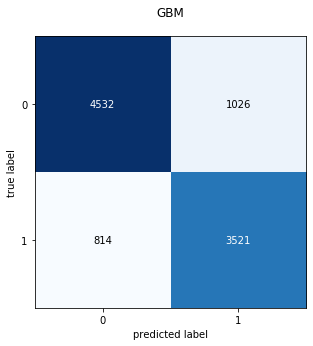

In [118]:
pred_model3 = gbm.predict(X_test)

import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# Get the confusion matrix

CM = confusion_matrix(y_test, pred_model3)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.title("GBM")
plt.show()

In [119]:
averaging = VotingClassifier(
    estimators = [('logreg', logreg), ('tree', tree), ('knn', knn)],
    voting = 'soft')
averaging.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('tree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='...
                                        

In [120]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0)
ada.fit(X_train, y_train).score(X_test, y_test)

0.7804508238148186

In [121]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz = []
accuracy = []
std = []
classifiers = ['Voting','Averaging','Stacking','Bagging','AdaBoost','Gradient Boosting']
models = [voting, averaging, stacking, bagging, ada, gbm]

for model in models:
    cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

models_dataframe = pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy,index=classifiers)
box.T.boxplot()

C:\Users\TJ\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\TJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\TJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\TJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % sel

KeyboardInterrupt: 

In [ ]:
from mlxtend.classifier import StackingClassifier

np.random.seed(1671)

stacking = StackingClassifier(classifiers=[tree, knn, svm, mlp], 
                              meta_classifier=logreg, # blender or meta-learner
                              use_probas=False,
                              average_probas=False)

for clf in (tree, knn, svm, mlp, stacking) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, accuracy_score(
        y_test, clf.predict(X_test)))

In [ ]:
pred_model3 = stacking.predict(X_test)

import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# Get the confusion matrix

CM = confusion_matrix(y_test, pred_model3)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.title("LogisticRegression tree")
plt.show()

In [122]:
final = mem_data[mem_data.GENDER==2 ]
final.head()

,MEM_ID,GENDER,VISIT_CNT,SALES_AMT,USABLE_PNT,USED_PNT,ACC_PNT,SMS,E_DAY,R_REGION,요일구매패턴,SALES_AVG,POINT_FREQ,STORE_ID,SELL_DT,MEMP_STY,MEMP_DT,SELL_AMT,MEMP_TP
38,91791,2,11.0,12.04591,3408.0,0.0,8.134174,1,676,4,1,1.095083,0.0,1277,20060711,O,0,6600,0
39,91791,2,11.0,12.04591,3408.0,0.0,8.134174,1,676,4,1,1.095083,0.0,1277,20060814,O,0,25100,0
40,91791,2,11.0,12.04591,3408.0,0.0,8.134174,1,676,4,1,1.095083,0.0,1277,20060919,O,0,21600,0
41,91791,2,11.0,12.04591,3408.0,0.0,8.134174,1,676,4,1,1.095083,0.0,1277,20061023,O,0,18800,0
42,91791,2,11.0,12.04591,3408.0,0.0,8.134174,1,676,4,1,1.095083,0.0,1277,20061113,O,0,23100,0


In [123]:
X_train

,VISIT_CNT,SALES_AMT,USABLE_PNT,USED_PNT,ACC_PNT,SMS,E_DAY,R_REGION,요일구매패턴,SALES_AVG,POINT_FREQ,STORE_ID,SELL_DT,SELL_AMT
8522,4.0,10.945547,1134.0,0.0,7.034388,1,676,0,1,2.736387,0.000000,543,20060420,5500
50868,17.0,12.464587,5488.0,0.0,8.610501,1,676,0,1,0.733211,0.000000,997,20060605,3000
34777,14.0,12.960082,8502.0,0.0,9.048174,1,676,0,1,0.925720,0.000000,3635,20070605,7700
49815,20.0,12.055837,0.0,4700.0,8.144098,1,676,0,1,0.602792,389.852657,548,20070303,8800
13597,31.0,12.786893,1850.0,5300.0,8.875007,1,676,0,1,0.412480,414.486914,3421,20070819,7400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29799,8.0,12.104599,1654.0,0.0,7.411556,1,676,0,1,1.513075,0.000000,997,20061213,7700
49241,1.0,10.547996,762.0,0.0,6.637258,1,676,0,1,10.547996,0.000000,130,20071105,21800
43821,19.0,12.666502,6339.0,0.0,8.754634,1,676,0,1,0.666658,0.000000,457,20071022,9300
30470,16.0,13.865063,4064.0,15500.0,9.881498,1,676,0,1,0.866566,1117.917724,997,20060716,55800


In [124]:
final = final.drop(columns='GENDER')


In [125]:
final.head()

,MEM_ID,VISIT_CNT,SALES_AMT,USABLE_PNT,USED_PNT,ACC_PNT,SMS,E_DAY,R_REGION,요일구매패턴,SALES_AVG,POINT_FREQ,STORE_ID,SELL_DT,MEMP_STY,MEMP_DT,SELL_AMT,MEMP_TP
38,91791,11.0,12.04591,3408.0,0.0,8.134174,1,676,4,1,1.095083,0.0,1277,20060711,O,0,6600,0
39,91791,11.0,12.04591,3408.0,0.0,8.134174,1,676,4,1,1.095083,0.0,1277,20060814,O,0,25100,0
40,91791,11.0,12.04591,3408.0,0.0,8.134174,1,676,4,1,1.095083,0.0,1277,20060919,O,0,21600,0
41,91791,11.0,12.04591,3408.0,0.0,8.134174,1,676,4,1,1.095083,0.0,1277,20061023,O,0,18800,0
42,91791,11.0,12.04591,3408.0,0.0,8.134174,1,676,4,1,1.095083,0.0,1277,20061113,O,0,23100,0


In [133]:
final['GENDER'] = averaging.predict

In [134]:
final.head()

,MEM_ID,VISIT_CNT,SALES_AMT,USABLE_PNT,USED_PNT,ACC_PNT,SMS,E_DAY,R_REGION,요일구매패턴,SALES_AVG,POINT_FREQ,STORE_ID,SELL_DT,MEMP_STY,MEMP_DT,SELL_AMT,MEMP_TP,GENDER
38,91791,11.0,12.04591,3408.0,0.0,8.134174,1,676,4,1,1.095083,0.0,1277,20060711,O,0,6600,0,<bound method VotingClassifier.predict of Voti...
39,91791,11.0,12.04591,3408.0,0.0,8.134174,1,676,4,1,1.095083,0.0,1277,20060814,O,0,25100,0,<bound method VotingClassifier.predict of Voti...
40,91791,11.0,12.04591,3408.0,0.0,8.134174,1,676,4,1,1.095083,0.0,1277,20060919,O,0,21600,0,<bound method VotingClassifier.predict of Voti...
41,91791,11.0,12.04591,3408.0,0.0,8.134174,1,676,4,1,1.095083,0.0,1277,20061023,O,0,18800,0,<bound method VotingClassifier.predict of Voti...
42,91791,11.0,12.04591,3408.0,0.0,8.134174,1,676,4,1,1.095083,0.0,1277,20061113,O,0,23100,0,<bound method VotingClassifier.predict of Voti...


In [ ]:
final.to_excel('케글 성별예측 최종.xlsx')